##Principal component analysis PCA

## Example

We will use (sorry) the classical `iris` dataset.

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)



The dataset contains a set of 150 records under 5 attributes 

* Petal Length
* Petal Width
* Sepal Length
* Sepal width
* Class(Species)

This dataset became a typical test case for many statistical techniques in machine learning such as clasification, clustering, and dimensionality reduction.

In [ ]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [ ]:
import io

from pandas import ExcelWriter
from pandas import ExcelFile

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 860_map_full_spectrum_combined_categories_simp_2.csv to 860_map_full_spectrum_combined_categories_simp_2.csv


### Load the data

In [ ]:
# load dataset into Pandas DataFrame
data = pd.read_csv(io.BytesIO(uploaded['860_map_full_spectrum_combined_categories_simp_2.csv']))
print(data)

     location  aliceblue   antiquewhite  ...  whitesmoke  yellow  yellowgreen
0           0      0.001          0.013  ...       0.022       0        0.000
1           1      0.001          0.004  ...       0.017       0        0.000
2           2      0.000          0.020  ...       0.007       0        0.000
3           3      0.002          0.005  ...       0.023       0        0.000
4           4      0.000          0.015  ...       0.006       0        0.000
..        ...        ...            ...  ...         ...     ...          ...
823       855      0.000          0.007  ...       0.017       0        0.000
824       856      0.000          0.005  ...       0.020       0        0.000
825       857      0.000          0.006  ...       0.022       0        0.000
826       858      0.000          0.007  ...       0.019       0        0.000
827       859      0.000          0.007  ...       0.019       0        0.000

[828 rows x 149 columns]


In [ ]:
print(data)

     location  aliceblue   antiquewhite  ...  whitesmoke  yellow  yellowgreen
0           0      0.001          0.013  ...       0.022       0        0.000
1           1      0.001          0.004  ...       0.017       0        0.000
2           2      0.000          0.020  ...       0.007       0        0.000
3           3      0.002          0.005  ...       0.023       0        0.000
4           4      0.000          0.015  ...       0.006       0        0.000
..        ...        ...            ...  ...         ...     ...          ...
823       855      0.000          0.007  ...       0.017       0        0.000
824       856      0.000          0.005  ...       0.020       0        0.000
825       857      0.000          0.006  ...       0.022       0        0.000
826       858      0.000          0.007  ...       0.019       0        0.000
827       859      0.000          0.007  ...       0.019       0        0.000

[828 rows x 149 columns]


### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Columns: 149 entries, location to yellowgreen
dtypes: float64(123), int64(26)
memory usage: 964.0 KB


In [ ]:
# Print the first 5 rows
data.head()

,location,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,...,palegoldenrod,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen
0,0,0.001,0.013,0,0.000,0.000,0.013,0.008,0.000,0.002,0.000,0.000,0.000,0.016,0.000,0,0.000,0.000,0.000,0.001,0.000,0,0.000,0.000,0.000,0,0.000,0.038,0.010,0,0.003,0,0.000,0.000,0.002,0.001,0.000,0,0.002,0.000,...,0.011,0.000,0.003,0.000,0.000,0.002,0.001,0.004,0.000,0.004,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.163,0.000,0.000,0.001,0,0.022,0,0.000,0.017,0.000,0.003,0.000,0.000,0.000,0.012,0.035,0.022,0,0.000
1,1,0.001,0.004,0,0.000,0.000,0.010,0.002,0.000,0.001,0.000,0.000,0.000,0.004,0.000,0,0.000,0.000,0.000,0.001,0.000,0,0.000,0.000,0.000,0,0.000,0.021,0.003,0,0.000,0,0.000,0.000,0.000,0.022,0.000,0,0.000,0.000,...,0.001,0.003,0.003,0.000,0.000,0.000,0.000,0.001,0.000,0.022,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.263,0.000,0.000,0.000,0,0.009,0,0.000,0.006,0.000,0.001,0.000,0.000,0.000,0.003,0.039,0.017,0,0.000
2,2,0.000,0.020,0,0.000,0.000,0.414,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000,0.012,0.001,0,0.000,0,0.000,0.000,0.001,0.107,0.000,0,0.000,0.000,...,0.025,0.003,0.001,0.001,0.000,0.001,0.000,0.001,0.000,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.129,0.000,0.000,0.000,0,0.003,0,0.000,0.003,0.000,0.001,0.000,0.000,0.000,0.008,0.010,0.007,0,0.000
3,3,0.002,0.005,0,0.000,0.000,0.014,0.003,0.000,0.001,0.000,0.000,0.000,0.002,0.003,0,0.000,0.000,0.001,0.000,0.000,0,0.000,0.000,0.000,0,0.000,0.024,0.003,0,0.001,0,0.000,0.000,0.000,0.019,0.000,0,0.001,0.000,...,0.034,0.001,0.008,0.000,0.000,0.002,0.000,0.001,0.000,0.012,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.188,0.002,0.000,0.000,0,0.012,0,0.000,0.007,0.000,0.005,0.000,0.000,0.000,0.013,0.031,0.023,0,0.000
4,4,0.000,0.015,0,0.000,0.000,0.197,0.003,0.000,0.001,0.000,0.000,0.000,0.010,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000,0.019,0.003,0,0.000,0,0.000,0.000,0.005,0.159,0.000,0,0.000,0.000,...,0.044,0.001,0.004,0.007,0.000,0.002,0.000,0.004,0.000,0.001,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.097,0.000,0.000,0.000,0,0.003,0,0.000,0.009,0.000,0.001,0.000,0.000,0.000,0.011,0.010,0.006,0,0.000


In [ ]:
# Descriptive statistics
data.describe()

,location,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,...,palegoldenrod,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen
count,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,...,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000
mean,431.761,0.000,0.008,0.000,0.000,0.000,0.027,0.005,0.000,0.001,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.031,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.021,0.000,0.000,0.001,0.000,...,0.024,0.001,0.004,0.000,0.000,0.001,0.000,0.002,0.000,0.009,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.140,0.000,0.000,0.000,0.000,0.016,0.000,0.000,0.009,0.000,0.003,0.000,0.000,0.000,0.006,0.047,0.022,0.000,0.000
std,249.306,0.000,0.004,0.000,0.000,0.000,0.047,0.002,0.000,0.001,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.002,0.000,0.000,0.000,0.000,0.000,0.001,0.031,0.000,0.000,0.001,0.000,...,0.035,0.001,0.003,0.001,0.000,0.001,0.000,0.001,0.000,0.008,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.048,0.001,0.000,0.000,0.000,0.007,0.000,0.000,0.004,0.000,0.004,0.000,0.000,0.000,0.003,0.020,0.005,0.000,0.000
min,0.000,0.000,0.001,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.032,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.003,0.003,0.000,0.000
25%,215.750,0.000,0.005,0.000,0.000,0.000,0.011,0.003,0.000,0.001,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.023,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,...,0.008,0.000,0.002,0.000,0.000,0.001,0.000,0.001,0.000,0.004,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.105,0.000,0.000,0.000,0.000,0.011,0.000,0.000,0.006,0.000,0.001,0.000,0.000,0.000,0.004,0.035,0.019,0.000,0.000
50%,435.500,0.000,0.007,0.000,0.000,0.000,0.014,0.005,0.000,0.001,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.031,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.009,0.000,0.000,0.001,0.000,...,0.014,0.000,0.003,0.000,0.000,0.001,0.000,0.002,0.000,0.007,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.148,0.000,0.000,0.000,0.000,0.015,0.000,0.000,0.009,0.000,0.002,0.000,0.000,0.000,0.005,0.044,0.022,0.000,0.000
75%,648.250,0.001,0.010,0.000,0.000,0.000,0.019,0.006,0.000,0.001,0.000,0.000,0.000,0.013,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.0

In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='silver')

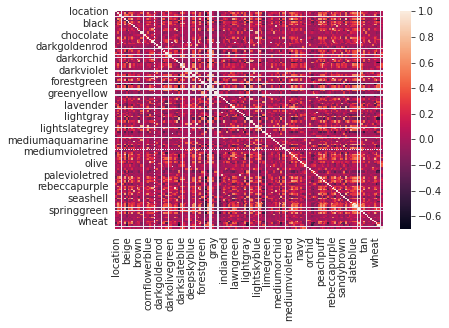

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data.set_index('category2', inplace=True)

KeyError: ignored

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data.columns).describe()

,Unnamed: 0,aliceblue','antiquewhite','aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkgreen','darkgrey','darkkhaki','darkmagenta','darkolivegreen','darkorange','darkorchid','darkred','darksalmon','darkseagreen','darkslateblue','darkslategray','darkslategrey','darkturquoise',...,'palegoldenrod','palegreen','paleturquoise','palevioletred','papayawhip','peachpuff','peru','pink','plum','powderblue','purple','rebeccapurple','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','seashell','sienna','silver','skyblue','slateblue','slategray','slategrey','snow','springgreen','steelblue','tan','teal','thistle','tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen'
count,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,...,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000,860.000
mean,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,...,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,0.000,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.000,1.001,1.001,1.001,1.001,1.001,0.000,1.001,1.001,1.001,0.000,1.001,1.001,1.001,0.000,1.001,0.000,1.001,1.001,1.001,1.001,1.001,0.000,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.000,1.001,0.000,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.000,1.001
min,-1.730,-1.432,-1.913,0.000,-0.940,-1.278,-0.496,-1.921,-0.552,-1.644,-0.361,-0.034,-0.596,-1.441,-0.319,0.000,-0.206,-0.263,-0.443,-2.289,-0.394,0.000,-0.288,-0.070,-0.551,0.000,-0.534,-2.089,-1.539,0.000,-1.938,0.000,-0.103,-0.594,-0.971,-0.656,-0.520,0.000,-0.859,-0.138,...,-0.668,-0.869,-1.377,-0.161,-1.196,-1.776,-0.699,-1.634,-0.741,-1.111,-0.117,-0.637,-0.568,-1.483,-0.534,-1.015,-0.466,-0.840,-0.704,-1.306,-1.365,-2.291,-0.379,-1.171,-1.199,0.000,-2.234,0.000,-1.001,-2.262,-0.048,-0.734,-0.430,-0.103,-0.085,-1.981,-2.235,-3.621,0.000,-0.479
25%,-0.865,-0.698,-0.755,0.000,-0.600,-0.733,-0.346,-0.752,-0.552,-0.655,-0.361,-0.034,-0.596,-0.831,-0.275,0.000,-0.206,-0.263,-0.411,-0.673,-0.394,0.000,-0.288,-0.070,-0.551,0.000,-0.534,-0.794,-0.788,0.000,-0.708,0.000,-0.103,-0.594,-0.868,-0.521,-0.475,0.000,-0.686,-0.138,...,-0.456,-0.605,-0.644,-0.161,-0.616,-0.748,-0.489,-0.747,-0.741,-0.659,-0.117,-0.637,-0.568,-0.773,-0.534,-0.767,-0.466,-0.840,-0.581,-0.712,-0.727,-0.753,-0.369,-0.733,-0.680,0.000,-0.744,0.000,-0.681,-0.753,-0.048,-0.450,-0.430,-0.103,-0.085,-0.661,-0.635,-0.520,0.000,-0.479
50%,0.000,-0.215,-0.156,0.000,-0.261,-0.255,-0.279,-0.061,-0.354,-0.204,-0.361,-0.034,-0.514,-0.153,-0.201,0.000,-0.206,-0.263,-0.358,-0.093,-0.394,0.000,-0.288,-0.070,-0.551,0.000,-0.534,-0.038,-0.124,0.000,-0.091,0.000,-0.103,-0.594,-0.336,-0.383,-0.374,0.000,-0.229,-0.138,...,-0.284,-0.379,-0.210,-0.1

### Executingh PCA

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

### Inspecting Results

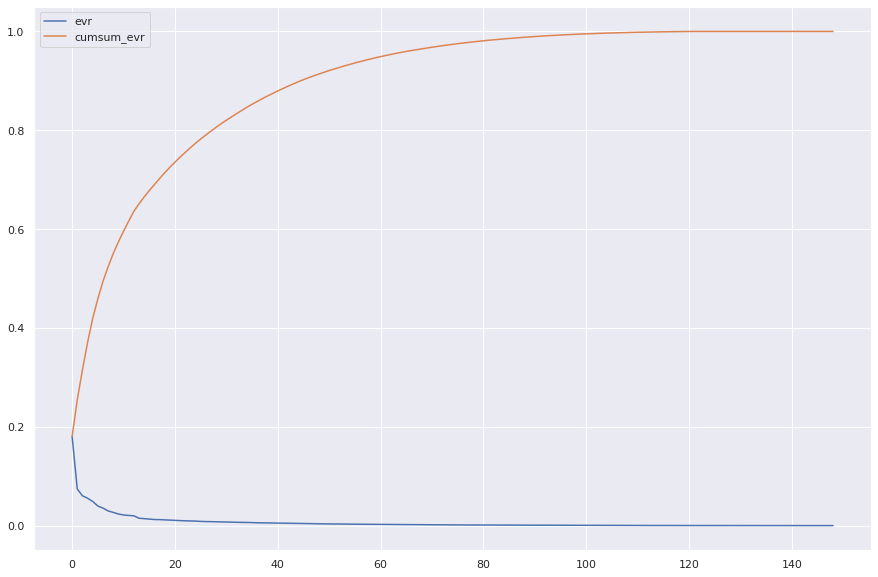

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[1.80379993e-01 7.40752865e-02 6.03508299e-02 5.54122254e-02
 4.88572119e-02 3.96796379e-02 3.54206996e-02 2.96520309e-02
 2.66994225e-02 2.35112477e-02 2.14985868e-02 2.05141036e-02
 1.98295216e-02 1.49459395e-02 1.40200486e-02 1.29745156e-02
 1.22425039e-02 1.21181532e-02 1.16808852e-02 1.10386266e-02
 1.05983130e-02 1.00643680e-02 9.68708216e-03 9.39157141e-03
 9.12326232e-03 8.46243244e-03 8.10756419e-03 7.96459053e-03
 7.68368731e-03 7.48811419e-03 6.91010962e-03 6.65761880e-03
 6.62685896e-03 6.48803788e-03 6.36338081e-03 6.00485689e-03
 5.74047977e-03 5.61457667e-03 5.44672604e-03 5.18041484e-03
 5.04457080e-03 4.86013722e-03 4.73030086e-03 4.67052686e-03
 4.42949452e-03 4.12665781e-03 4.04531144e-03 3.73180129e-03
 3.63274422e-03 3.53453471e-03 3.46080025e-03 3.26818676e-03
 3.18902917e-03 3.11671222e-03 2.98643132e-03 2.82726794e-03
 2.74328890e-03 2.67266577e-03 2.58857603e-03 2.49943534e-03
 2.34248880e-03 2.25717674e-03 2.19865678e-03 2.13150660e-03
 2.02221722e-03 1.914593

PLOTTING ALL THE PCS

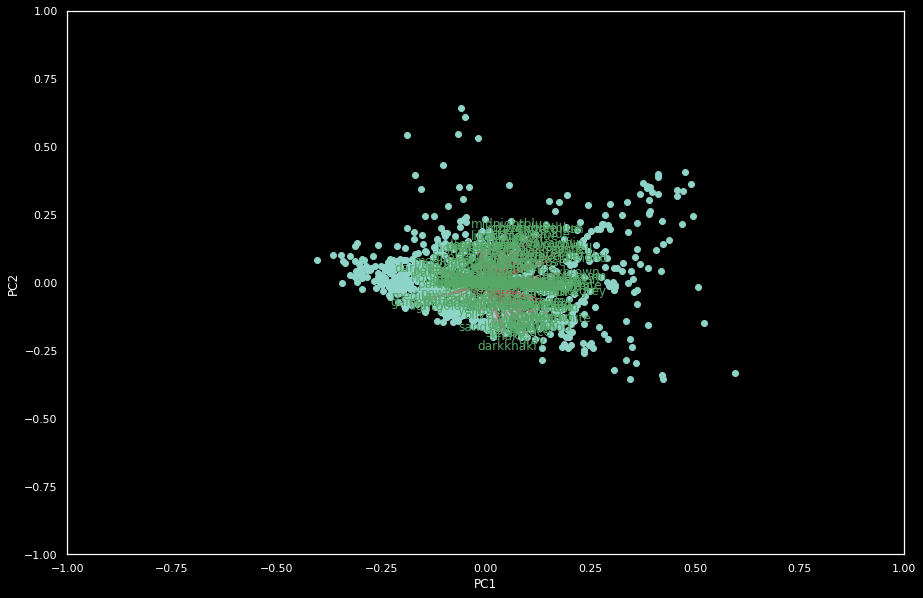

In [ ]:
plt.style.use('dark_background')

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1/(xs.max() - xs.min())
    scaley = 1/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

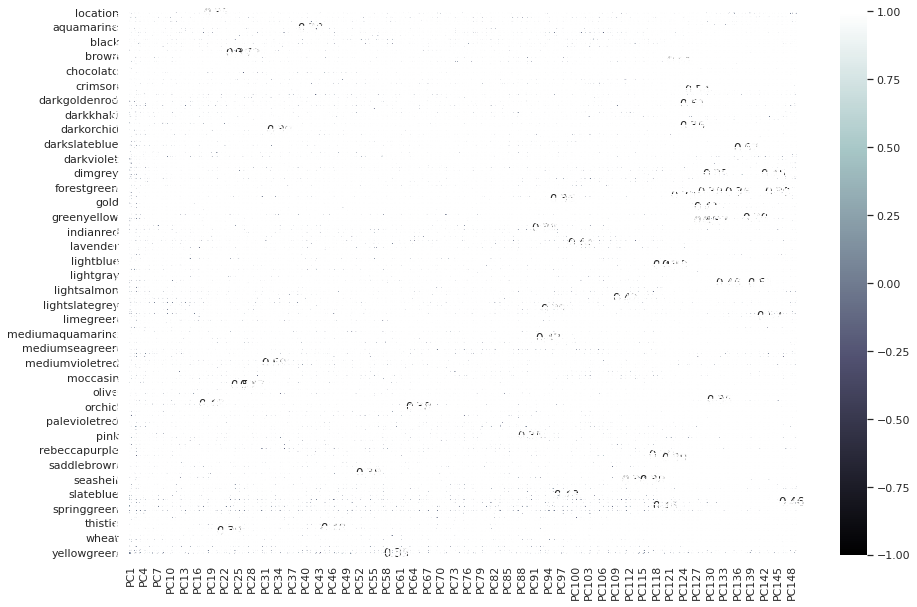

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

         0              1
0      PC0      mintcream
1      PC1      darkkhaki
2      PC2      steelblue
3      PC3     whitesmoke
4      PC4  darkslategrey
..     ...            ...
144  PC144      lawngreen
145  PC145      goldenrod
146  PC146      slategrey
147  PC147    springgreen
148  PC148         yellow

[149 rows x 2 columns]


In [ ]:
# saving the dataframe 
df.to_csv('pca_result_2.csv') 
!cp pca_result_2.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory
